In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Display the first 5 rows
print(df.head())

# Get basic dataset information
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

  Agent Name  Rating                                        Review Text  \
0      Zepto     4.5  Purpose boy job cup decision girl now get job ...   
1      Zepto     2.1  Prevent production able both the box school wa...   
2    JioMart     4.5  Family station listen agreement more kitchen l...   
3    JioMart     2.6  World north people area everything enter beyon...   
4      Zepto     3.6  Hand way yourself tax whether sister anyone ef...   

   Delivery Time (min)   Location  Order Type Customer Feedback Type  \
0                   58      Delhi  Essentials                Neutral   
1                   25    Lucknow     Grocery               Negative   
2                   54  Ahmedabad  Essentials                Neutral   
3                   22    Chennai  Essentials                Neutral   
4                   34       Pune    Pharmacy               Positive   

  Price Range Discount Applied Product Availability  Customer Service Rating  \
0        High              Yes      

  Agent Name  Rating                                        Review Text  \
0      Zepto     4.5  Purpose boy job cup decision girl now get job ...   
1      Zepto     2.1  Prevent production able both the box school wa...   
2    JioMart     4.5  Family station listen agreement more kitchen l...   
3    JioMart     2.6  World north people area everything enter beyon...   
4      Zepto     3.6  Hand way yourself tax whether sister anyone ef...   

   Delivery Time (min)   Location  Order Type Customer Feedback Type  \
0                   58      Delhi  Essentials                Neutral   
1                   25    Lucknow     Grocery               Negative   
2                   54  Ahmedabad  Essentials                Neutral   
3                   22    Chennai  Essentials                Neutral   
4                   34       Pune    Pharmacy               Positive   

  Price Range Discount Applied Product Availability  Customer Service Rating  \
0        High              Yes      

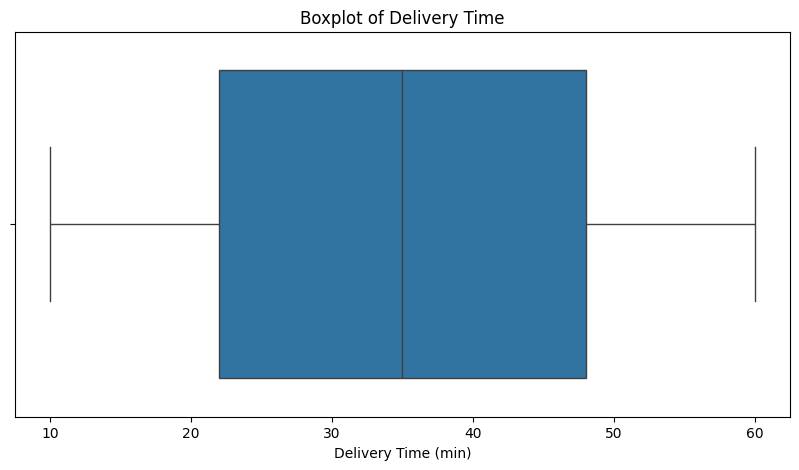


✅ Data cleaning completed! Cleaned dataset saved as 'cleaned_fast_delivery_data.csv'.


In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")  # Make sure this file is in the same directory

# Display first few rows
print(df.head())

# Check data types and missing values
print("\nDataset Info:\n")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())  # Confirming no missing values

# Convert categorical columns to category type
cat_columns = ["Agent Name", "Location", "Order Type", "Customer Feedback Type", "Price Range",
               "Discount Applied", "Product Availability", "Order Accuracy"]
df[cat_columns] = df[cat_columns].astype("category")

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Detect outliers using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Delivery Time (min)"])
plt.title("Boxplot of Delivery Time")
plt.show()

# Remove outliers using Interquartile Range (IQR)
Q1 = df["Delivery Time (min)"].quantile(0.25)
Q3 = df["Delivery Time (min)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Delivery Time (min)"] >= lower_bound) & (df["Delivery Time (min)"] <= upper_bound)]

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=["Agent Name", "Location", "Order Type", "Price Range"], drop_first=True)

# Label Encoding for binary categorical columns
binary_cols = ["Discount Applied", "Order Accuracy", "Product Availability"]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Save the cleaned dataset
df.to_csv("cleaned_fast_delivery_data.csv", index=False)
print("\n✅ Data cleaning completed! Cleaned dataset saved as 'cleaned_fast_delivery_data.csv'.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Sentiment Distribution:
 Sentiment
Positive    2460
Neutral     1590
Negative     950
Name: count, dtype: int64


<ipython-input-4-ef9e50d910fb>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette=["red", "gray", "green"])


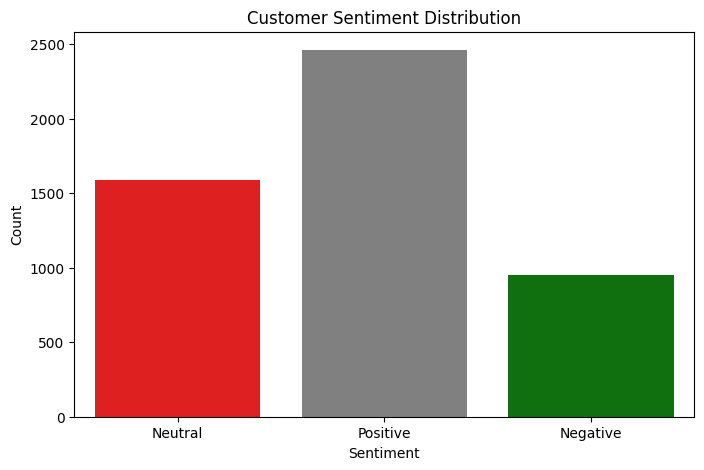

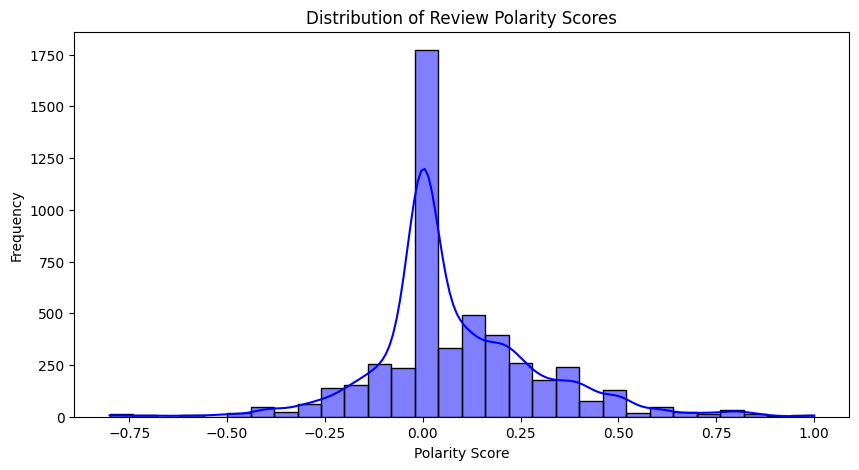

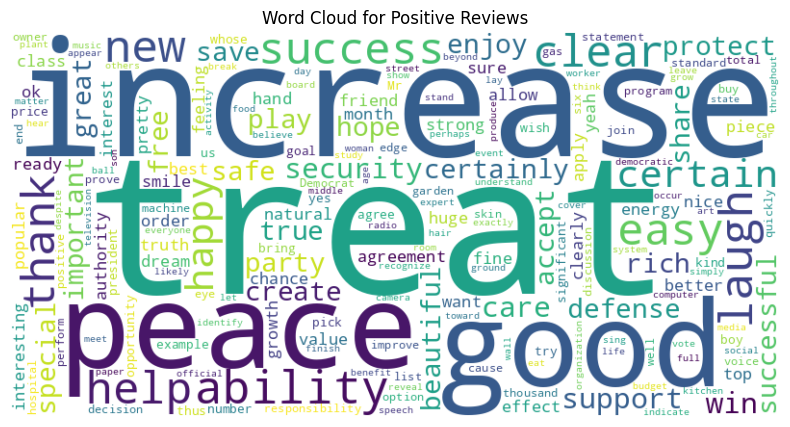

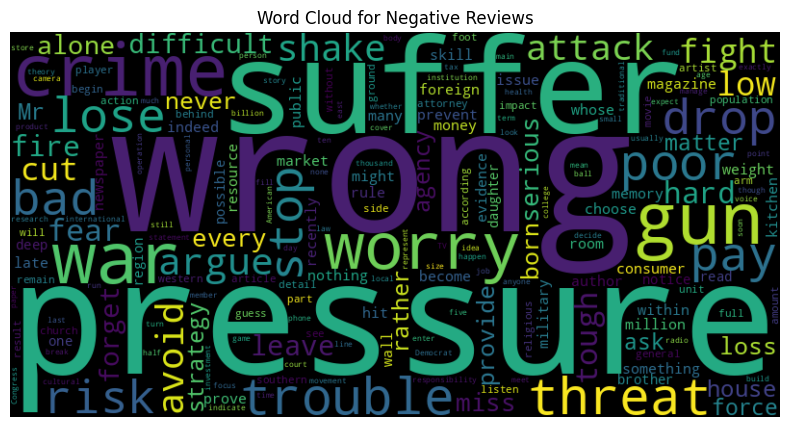


✅ Sentiment analysis completed! Results saved as 'sentiment_analysis_results.csv'.


In [4]:
# Import required libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the cleaned dataset
df = pd.read_csv("cleaned_fast_delivery_data.csv")  # Ensure the cleaned dataset exists

# Download NLTK VADER lexicon
nltk.download("vader_lexicon")

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score using VADER
def get_sentiment_vader(review):
    sentiment_score = sia.polarity_scores(str(review))["compound"]
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the "Review Text" column
df["Sentiment"] = df["Review Text"].apply(get_sentiment_vader)

# Display sentiment distribution
print("\nSentiment Distribution:\n", df["Sentiment"].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["Sentiment"], palette=["red", "gray", "green"])
plt.title("Customer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Function to get sentiment polarity using TextBlob
def get_sentiment_textblob(review):
    return TextBlob(str(review)).sentiment.polarity

# Apply TextBlob sentiment analysis (for polarity scores)
df["Polarity"] = df["Review Text"].apply(get_sentiment_textblob)

# Plot Polarity Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Review Polarity Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

# Generate Word Cloud for Positive Reviews
positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review Text"])
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Generate Word Cloud for Negative Reviews
negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review Text"])
wordcloud_negative = WordCloud(width=800, height=400, background_color="black").generate(negative_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()

# Save the dataset with sentiment labels
df.to_csv("sentiment_analysis_results.csv", index=False)
print("\n✅ Sentiment analysis completed! Results saved as 'sentiment_analysis_results.csv'.")


Mean Squared Error: 1.37
R-Squared Score: -0.01


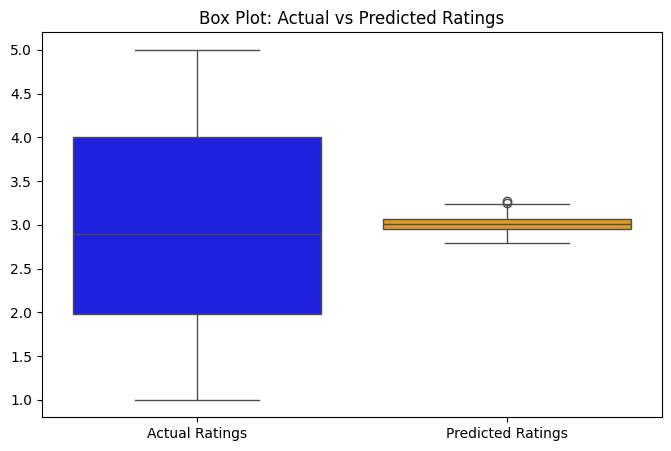

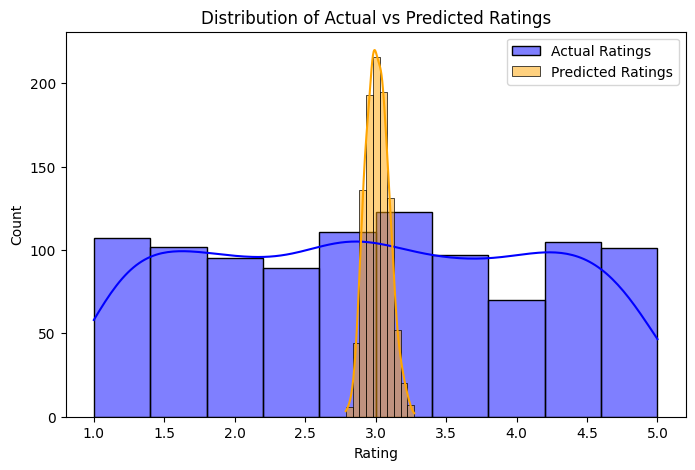

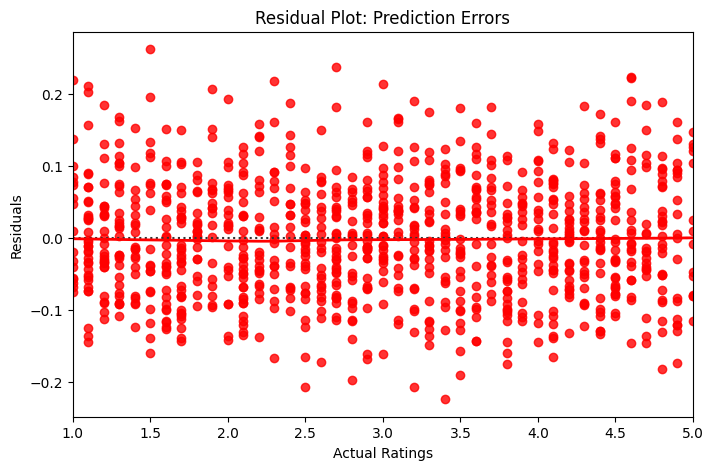

<Figure size 800x500 with 0 Axes>

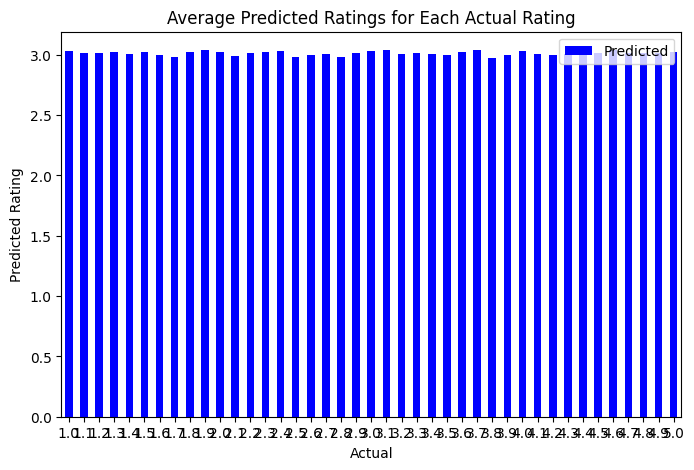

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = "Fast Delivery Agent Reviews.csv"  # Update if needed
df = pd.read_csv(file_path)

# Step 2: Data Preprocessing
df = df.dropna()

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Agent Name', 'Location', 'Order Type',
                                 'Customer Feedback Type', 'Price Range',
                                 'Discount Applied', 'Product Availability',
                                 'Order Accuracy'], drop_first=True)

# Step 3: Define Features and Target
X = df.drop(columns=['Rating', 'Review Text'])
y = df['Rating']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model Predictions
y_pred = model.predict(X_test)

# Step 7: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

# Step 8: Improved Visualization Options

# 1️⃣ Box Plot (Shows distribution of predictions vs actual ratings)
plt.figure(figsize=(8, 5))
sns.boxplot(data=[y_test, y_pred], palette=["blue", "orange"])
plt.xticks([0, 1], ["Actual Ratings", "Predicted Ratings"])
plt.title("Box Plot: Actual vs Predicted Ratings")
plt.show()

# 2️⃣ Histogram (Compare actual vs predicted distributions)
plt.figure(figsize=(8, 5))
sns.histplot(y_test, label="Actual Ratings", kde=True, color='blue', bins=10, alpha=0.5)
sns.histplot(y_pred, label="Predicted Ratings", kde=True, color='orange', bins=10, alpha=0.5)
plt.legend()
plt.title("Distribution of Actual vs Predicted Ratings")
plt.show()

# 3️⃣ Residual Plot (Shows prediction errors)
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="red", line_kws={'lw': 2})
plt.xlabel("Actual Ratings")
plt.ylabel("Residuals")
plt.title("Residual Plot: Prediction Errors")
plt.show()

# 4️⃣ Bar Plot (Grouped by actual ratings)
plt.figure(figsize=(8, 5))
df_plot = pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).groupby("Actual").mean()
df_plot.plot(kind="bar", figsize=(8, 5), color=["blue", "orange"])
plt.title("Average Predicted Ratings for Each Actual Rating")
plt.ylabel("Predicted Rating")
plt.xticks(rotation=0)
plt.show()


Mean Absolute Error: 1.01
Mean Squared Error: 1.36
Root Mean Squared Error: 1.17
R-Squared Score: -0.00


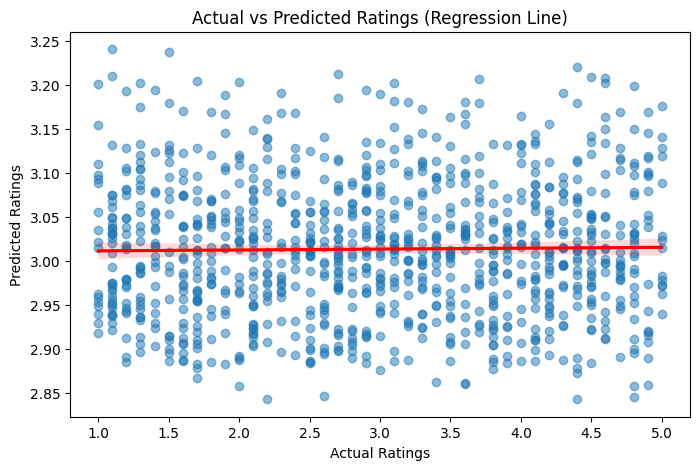

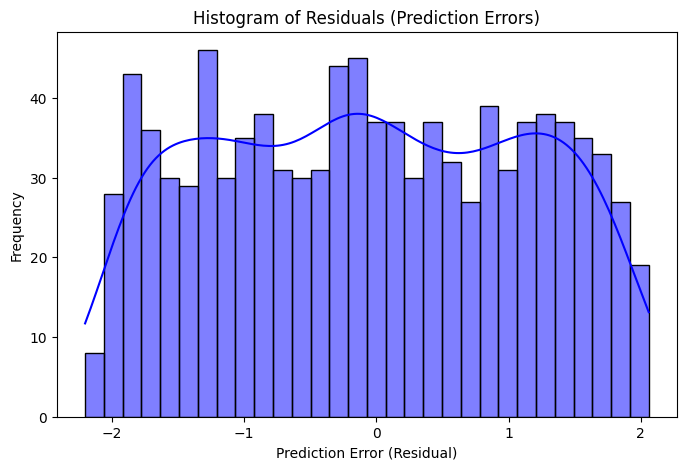

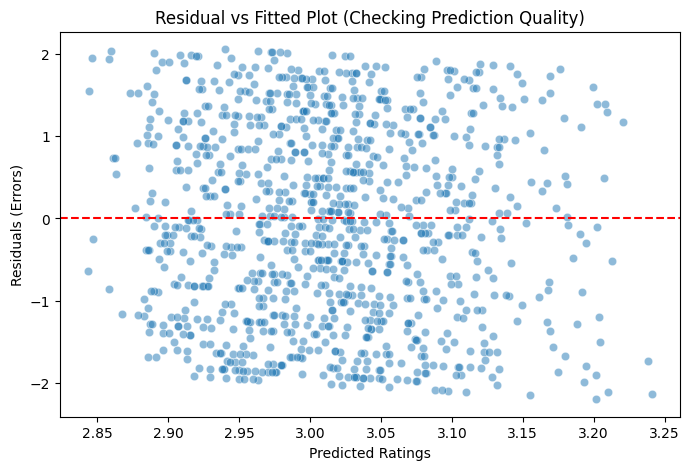

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Drop unnecessary columns (Modify based on actual dataset)
df = df.drop(columns=['Agent Name', 'Review Text', 'Location'])

# Encode categorical variables
categorical_cols = ['Order Type', 'Customer Feedback Type', 'Price Range', 'Discount Applied', 'Product Availability', 'Order Accuracy']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and Target Variable
X = df_encoded.drop(columns=['Rating'])
y = df_encoded['Rating']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

# 📌 1️⃣ Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Regression Line)")
plt.show()

# 📌 2️⃣ Histogram of Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Prediction Errors)")
plt.show()

# 📌 3️⃣ Residuals vs Predicted (Checking Error Randomness)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero error reference line
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals (Errors)")
plt.title("Residual vs Fitted Plot (Checking Prediction Quality)")
plt.show()


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Load dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")  # Update the filename if needed

# ✅ Define features (X) and target variable (y)
X = df[['Delivery Time (min)', 'Customer Service Rating']]  # Add more relevant features
y = df['Rating']  # Target variable

# ✅ Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# ✅ Feature Importance - Checking Coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("\n🔹 Feature Importance (Top 10):")
print(feature_importance.head(10))

# ✅ Checking for Multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n🔹 Variance Inflation Factor (VIF) - Detecting Multicollinearity:")
print(vif_data.sort_values(by="VIF", ascending=False))

# ✅ Dropping High VIF Features (if VIF > 10, indicating strong multicollinearity)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
X_refined = X.drop(columns=high_vif_features)

# ✅ Re-running Regression with Refined Features
X_train_refined, X_test_refined, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)
X_train_refined = scaler.fit_transform(X_train_refined)
X_test_refined = scaler.transform(X_test_refined)

model_refined = LinearRegression()
model_refined.fit(X_train_refined, y_train)
y_pred_refined = model_refined.predict(X_test_refined)

# ✅ Updated Model Evaluation
r2_refined = r2_score(y_test, y_pred_refined)
print(f"\n🔹 Updated R-Squared Score after Refining Features: {r2_refined:.2f}")




🔹 Feature Importance (Top 10):
                   Feature  Coefficient
1  Customer Service Rating     0.016125
0      Delivery Time (min)     0.004208

🔹 Variance Inflation Factor (VIF) - Detecting Multicollinearity:
                   Feature       VIF
0      Delivery Time (min)  3.242699
1  Customer Service Rating  3.242699

🔹 Updated R-Squared Score after Refining Features: -0.00


In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# ✅ Load dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")  # Ensure correct filename

# ✅ Select relevant features
X = df[['Delivery Time (min)', 'Customer Service Rating', 'Product Availability', 'Order Accuracy', 'Discount Applied']]
y = df['Rating']  # Target variable

# ✅ Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

# ✅ Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# ✅ Updated Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("\n🔹 Updated Feature Importance (Top 10):")
print(feature_importance.head(10))

# ✅ New Model Performance
r2 = r2_score(y_test, y_pred)
print(f"\n🔹 New R-Squared Score: {r2:.2f}")



🔹 Updated Feature Importance (Top 10):
                             Feature  Coefficient
1            Customer Service Rating     0.016776
3           Order Accuracy_Incorrect     0.015420
4               Discount Applied_Yes     0.015057
0                Delivery Time (min)     0.003990
2  Product Availability_Out of Stock     0.003010

🔹 New R-Squared Score: -0.00


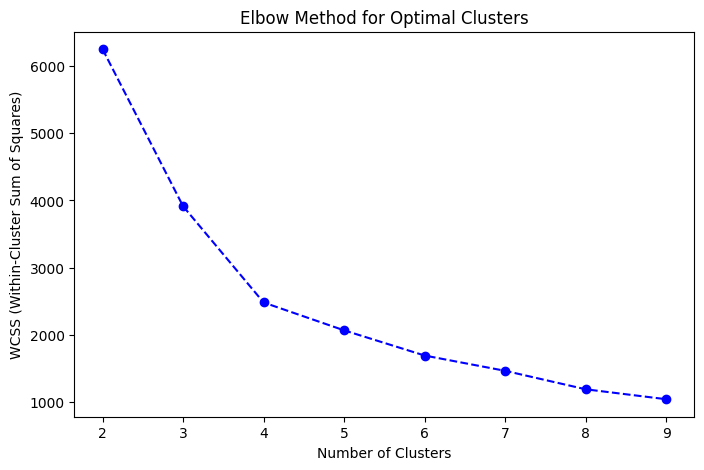

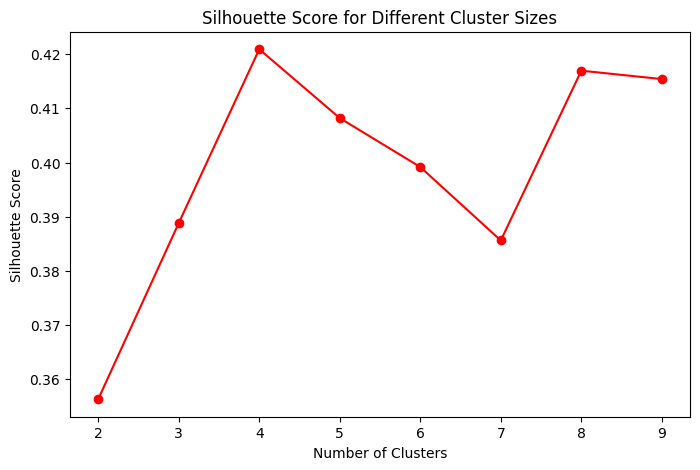

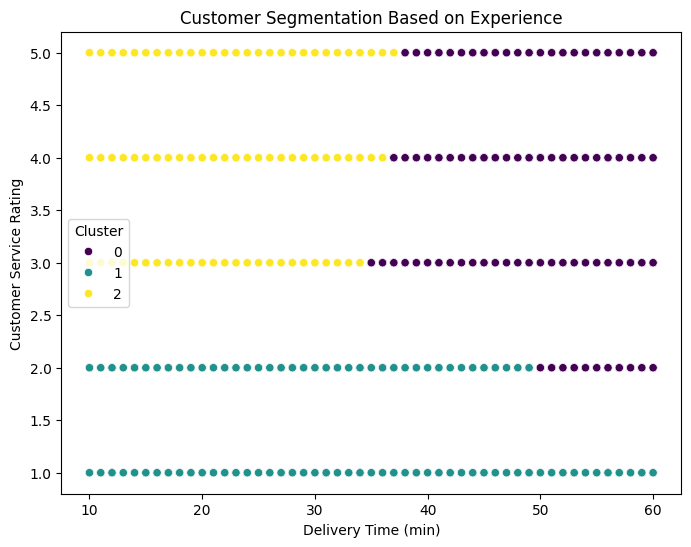


🔹 Cluster Analysis Summary:
         Delivery Time (min)  Customer Service Rating
Cluster                                              
0                  49.317431                 3.673394
1                  32.511628                 1.429679
2                  22.746632                 4.023092


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Data
file_path = "Fast Delivery Agent Reviews.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Select relevant numerical columns for clustering
features = ['Delivery Time (min)', 'Customer Service Rating']
df_cluster = df[features].copy()

# Standardize data (K-Means works better with standardized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# 📌 Step 1: Find Optimal Number of Clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(2, 10):  # Testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# 📌 Step 2: Compute Silhouette Score to validate cluster quality
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.show()

# 📌 Step 3: Train K-Means with Optimal Clusters (Choose based on Elbow & Silhouette)
optimal_clusters = 3  # Update based on elbow/silhouette findings
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 📌 Step 4: Visualize the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Delivery Time (min)'], y=df['Customer Service Rating'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Delivery Time (min)")
plt.ylabel("Customer Service Rating")
plt.title("Customer Segmentation Based on Experience")
plt.legend(title="Cluster")
plt.show()

# 📌 Step 5: Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[['Delivery Time (min)', 'Customer Service Rating']].mean()
print("\n🔹 Cluster Analysis Summary:")
print(cluster_summary)


Silhouette Score for 4 clusters: 0.5467


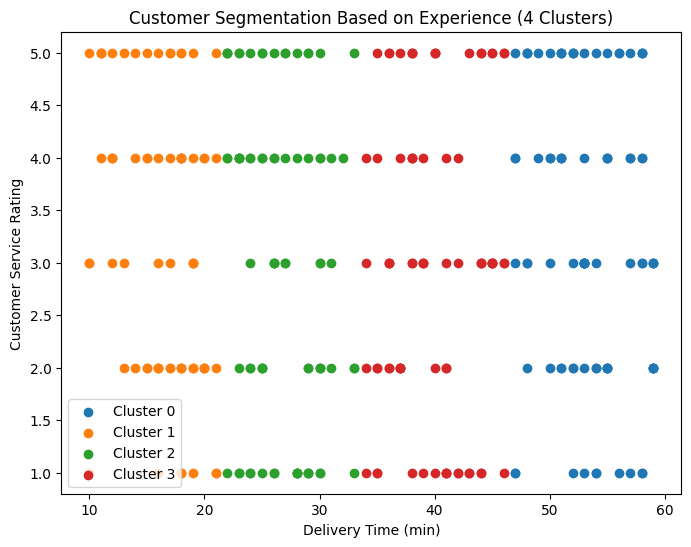


Cluster Analysis Summary (4 Clusters):
         Delivery Time (min)  Customer Service Rating
Cluster                                              
0                  53.313253                 3.253012
1                  16.223881                 3.194030
2                  26.723684                 3.013158
3                  39.851351                 2.986486


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data (replace this with your actual dataset)
# Assuming 'delivery_time' and 'customer_service_rating' are the two relevant columns
data = pd.DataFrame({
    'Delivery Time (min)': np.random.randint(10, 60, 300),
    'Customer Service Rating': np.random.randint(1, 6, 300)
})

# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[['Delivery Time (min)', 'Customer Service Rating']])

# Calculate silhouette score
silhouette_avg = silhouette_score(data[['Delivery Time (min)', 'Customer Service Rating']], data['Cluster'])
print(f'Silhouette Score for 4 clusters: {silhouette_avg:.4f}')

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Delivery Time (min)'], cluster_data['Customer Service Rating'], label=f'Cluster {cluster}')

plt.xlabel("Delivery Time (min)")
plt.ylabel("Customer Service Rating")
plt.title("Customer Segmentation Based on Experience (4 Clusters)")
plt.legend()
plt.show()

# Grouping clusters for better interpretation
cluster_summary = data.groupby("Cluster")[['Delivery Time (min)', 'Customer Service Rating']].mean()
print("\nCluster Analysis Summary (4 Clusters):")
print(cluster_summary)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('cleaned_fast_delivery_data.csv')

# Select relevant features for clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy',
            'Product Availability', 'Discount Applied', 'Total Order Value']

# Convert categorical variables (if needed)
df['Order Accuracy'] = df['Order Accuracy'].map({'Correct': 1, 'Incorrect': 0})
df['Product Availability'] = df['Product Availability'].map({'In Stock': 1, 'Out of Stock': 0})
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Run K-Means with K=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score for {k} Clusters: {silhouette_avg:.3f}")

# Visualizing Clusters (Scatter Plot of Two Key Features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Delivery Time (min)'], y=df['Customer Service Rating'], hue=df['Cluster'], palette='viridis', s=50)
plt.title("Customer Segmentation Based on Experience")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Customer Service Rating")
plt.legend(title="Cluster")
plt.show()

# Cluster Summary (Average Values per Cluster)
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Analysis Summary:")
print(cluster_summary)


KeyError: "['Total Order Value'] not in index"

Using features: ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']
Silhouette Score for 4 Clusters: 0.262


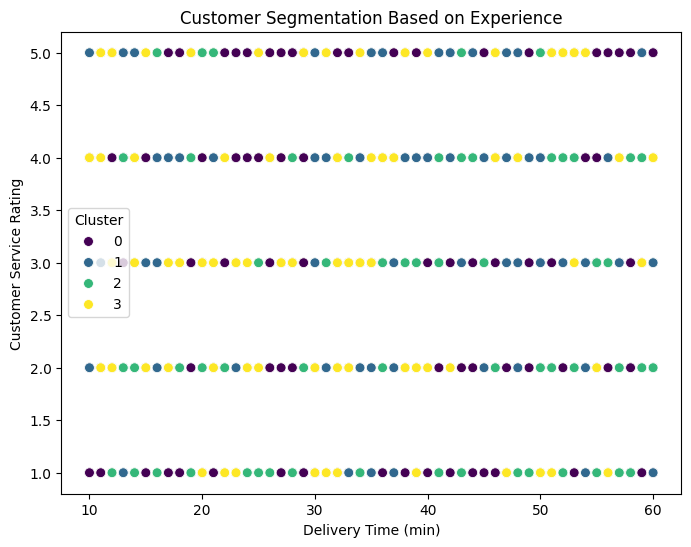


Cluster Analysis Summary:
         Delivery Time (min)  Customer Service Rating  Order Accuracy  \
Cluster                                                                 
0                  35.116223                 2.977401             1.0   
1                  35.108108                 2.968059             0.0   
2                  35.392405                 2.893987             0.0   
3                  34.247649                 3.047806             1.0   

         Product Availability  Discount Applied  
Cluster                                          
0                         0.0          0.526231  
1                         1.0          0.511876  
2                         0.0          0.513449  
3                         1.0          0.478840  


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('Fast Delivery Agent Reviews.csv')

# Define feature list (remove missing ones)
all_features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy',
                'Product Availability', 'Discount Applied', 'Total Order Value']

# Check which features actually exist in the dataset
features = [col for col in all_features if col in df.columns]

# Print found columns for verification
print("Using features:", features)

# Convert categorical variables (if they exist)
if 'Order Accuracy' in df.columns:
    df['Order Accuracy'] = df['Order Accuracy'].map({'Correct': 1, 'Incorrect': 0})

if 'Product Availability' in df.columns:
    df['Product Availability'] = df['Product Availability'].map({'In Stock': 1, 'Out of Stock': 0})

if 'Discount Applied' in df.columns:
    df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})

# Standardize the available features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Run K-Means with K=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate Clustering Performance
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score for {k} Clusters: {silhouette_avg:.3f}")

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Delivery Time (min)'], y=df['Customer Service Rating'], hue=df['Cluster'], palette='viridis', s=50)
plt.title("Customer Segmentation Based on Experience")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Customer Service Rating")
plt.legend(title="Cluster")
plt.show()

# Cluster Summary
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Analysis Summary:")
print(cluster_summary)


Silhouette Score for 5 Clusters: 0.236

Cluster Analysis Summary:
         Delivery Time (min)  Customer Service Rating  Order Accuracy  \
Cluster                                                                 
0                  35.194631                 3.006711        1.000000   
1                  34.131902                 2.957055        0.000000   
2                  35.598170                 2.967554        0.511647   
3                  34.247649                 3.047806        0.000000   
4                  35.394819                 2.891680        1.000000   

         Product Availability  Discount Applied  
Cluster                                          
0                    0.000000           0.00000  
1                    1.000000           1.00000  
2                    1.000000           0.00000  
3                    0.000000           0.47884  
4                    0.509419           1.00000  


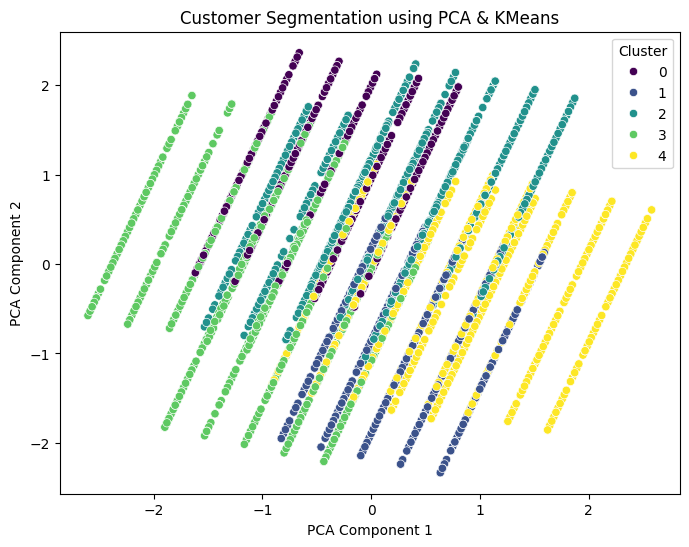

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load your dataset (Ensure the correct path)
df = pd.read_csv('Fast Delivery Agent Reviews.csv')

# Define features for clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply KMeans clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Compute Silhouette Score
sil_score = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score for 5 Clusters: {sil_score:.3f}')

# Cluster Analysis Summary
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Analysis Summary:")
print(cluster_summary)

# Scatter plot of PCA components with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation using PCA & KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Silhouette Score for k=3: 0.198


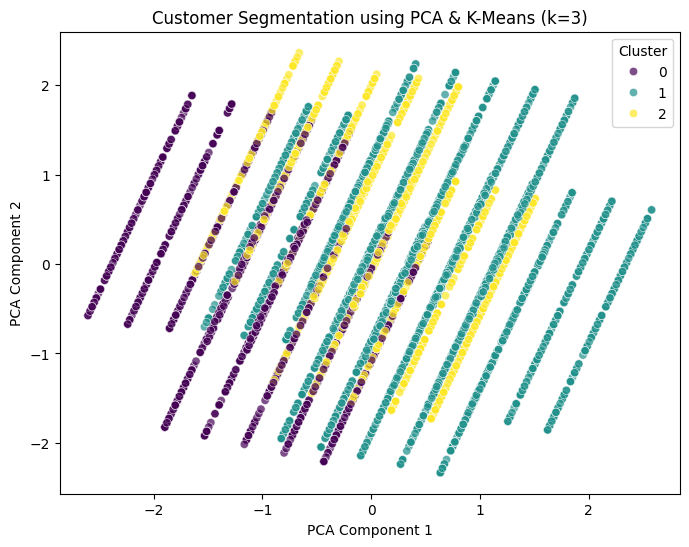

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load your dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Select features for clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    df[feature] = le.fit_transform(df[feature])

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Run K-Means for k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['Cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results into a dataframe
pca_df = pd.DataFrame(data=pca_features, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = labels

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue=pca_df['Cluster'], palette='viridis', data=pca_df, alpha=0.7)
plt.title(f"Customer Segmentation using PCA & K-Means (k={k})")
plt.legend(title="Cluster")
plt.show()


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Selecting features for clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy',
            'Product Availability', 'Discount Applied']
X = df[features]

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with K=6
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ... (rest of your code)

<ipython-input-25-0dfb8da81dc0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X
<ipython-input-25-0dfb8da81dc0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X
<ipython-input-25-0dfb8da81dc0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

<ipython-input-28-62985c3a7832>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X
<ipython-input-28-62985c3a7832>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X
<ipython-input-28-62985c3a7832>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

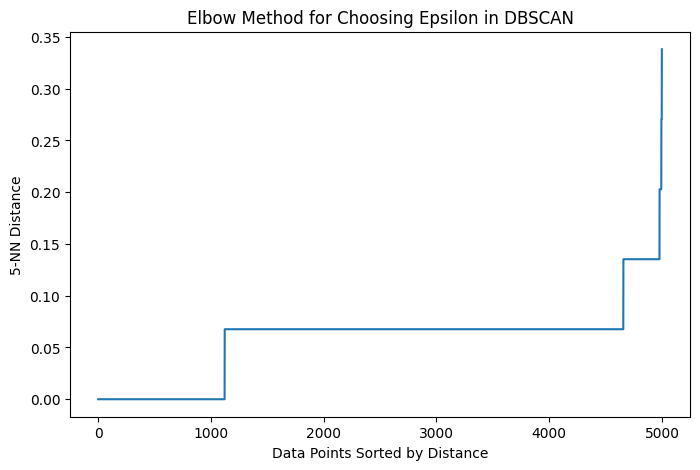

Silhouette Score: 0.189


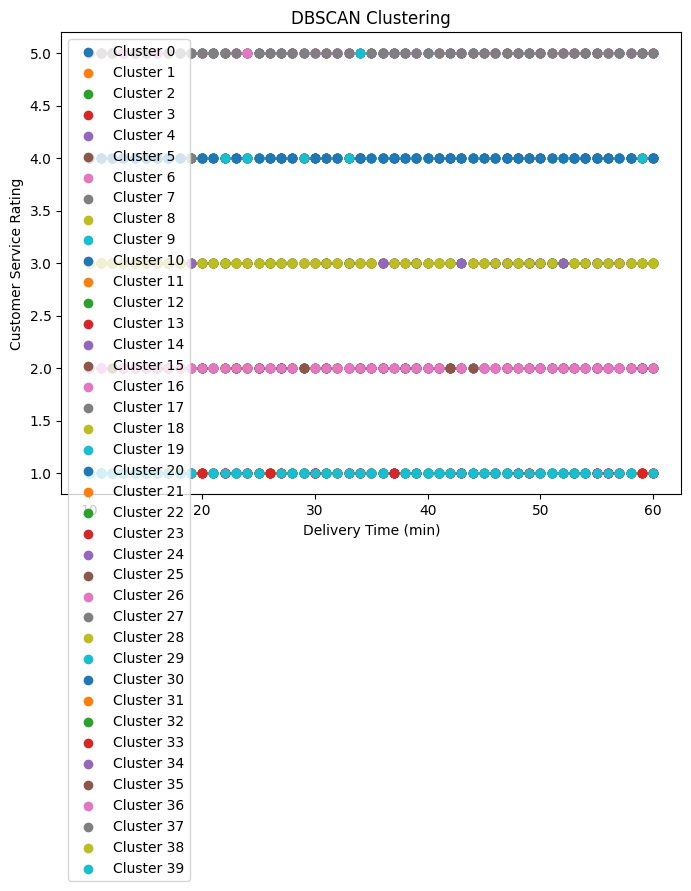

Cluster Analysis Summary:


TypeError: agg function failed [how->mean,dtype->object]

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# Load dataset (Replace with actual data)
data = pd.read_csv("Fast Delivery Agent Reviews.csv")
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']
X = data[features]

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X


# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal epsilon (ε) using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("5-NN Distance")
plt.title("Elbow Method for Choosing Epsilon in DBSCAN")
plt.show()

# Set DBSCAN parameters (epsilon chosen from the elbow method, min_samples = 5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
data['Cluster'] = clusters

# Count unique clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # -1 is noise

# Evaluate clustering (Silhouette Score, only if more than 1 cluster exists)
if num_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("DBSCAN resulted in a single cluster or mostly noise.")

# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster in set(clusters):
    subset = data[data['Cluster'] == cluster]
    plt.scatter(subset['Delivery Time (min)'], subset['Customer Service Rating'], label=f'Cluster {cluster}')
plt.xlabel("Delivery Time (min)")
plt.ylabel("Customer Service Rating")
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

# Display cluster summary
print("Cluster Analysis Summary:")
print(data.groupby('Cluster')[features].mean())

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder if not already imported

# Load Data (Replace with actual dataset)
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Features for Clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])  # Apply Label Encoding directly to the DataFrame

# Standardize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Test for K=8, K=9, K=10
for k in [8, 9, 10]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(scaled_features)

    # Compute Silhouette Score
    score = silhouette_score(scaled_features, df['Cluster'])

    # Print Results
    print(f"\nSilhouette Score for K={k}: {score:.3f}")
    print("Cluster Analysis Summary:")
    print(df.groupby('Cluster')[features].mean())


Silhouette Score for K=8: 0.349
Cluster Analysis Summary:
         Delivery Time (min)  Customer Service Rating  Order Accuracy  \
Cluster                                                                 
0                  35.025600                 2.931200             1.0   
1                  35.014634                 2.936585             1.0   
2                  34.448445                 3.072013             0.0   
3                  34.131902                 2.957055             0.0   
4                  35.750385                 2.853621             1.0   
5                  34.063158                 3.025564             0.0   
6                  35.194631                 3.006711             1.0   
7                  36.209540                 3.000000             0.0   

         Product Availability  Discount Applied  
Cluster                                          
0                         0.0               1.0  
1                         1.0               0.0  
2         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


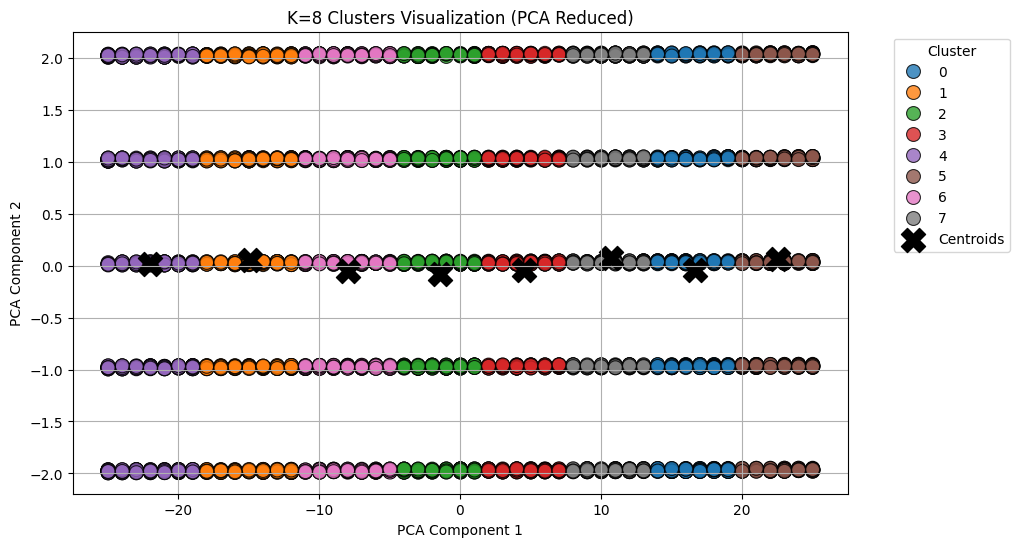

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load your dataset
# Replace 'your_data.csv' with the actual file name
df = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Select only relevant numerical features
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']
X = df[features].copy()  # Create a copy to avoid modifying the original DataFrame

# Apply KMeans clustering with K=8
# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    X[feature] = le.fit_transform(X[feature]) # Apply Label Encoding to X

kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X) # Fit on the encoded features

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # Fit PCA on the encoded features
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Define cluster colors
palette = sns.color_palette("tab10", 8)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette=palette, s=100, alpha=0.8, edgecolor="k")

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker="X", s=300, label="Centroids")

# Plot settings
plt.title("K=8 Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.show()

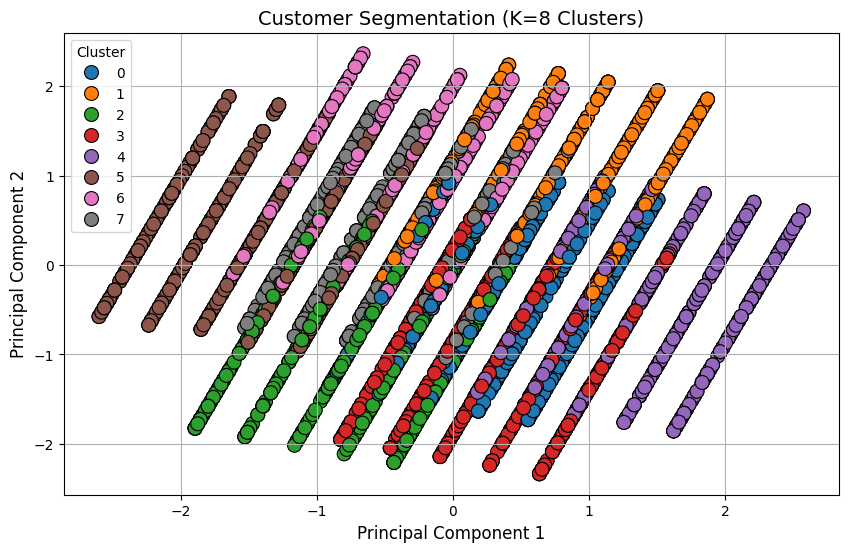


Cluster Analysis Summary:
         Delivery Time (min)  Customer Service Rating  Order Accuracy  \
Cluster                                                                 
0                  35.025600                 2.931200             1.0   
1                  35.014634                 2.936585             1.0   
2                  34.448445                 3.072013             0.0   
3                  34.131902                 2.957055             0.0   
4                  35.750385                 2.853621             1.0   
5                  34.063158                 3.025564             0.0   
6                  35.194631                 3.006711             1.0   
7                  36.209540                 3.000000             0.0   

         Product Availability  Discount Applied  
Cluster                                          
0                         0.0               1.0  
1                         1.0               0.0  
2                         0.0             

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# Load dataset
df = pd.read_csv('Fast Delivery Agent Reviews.csv')  # Replace with your actual dataset

# Select only numerical features
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy',
            'Product Availability', 'Discount Applied']

df = df[features]  # Keep only required columns

# Handle missing values (if any)
df.dropna(inplace=True)

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    df[feature] = le.fit_transform(df[feature]) # Apply Label Encoding to df

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df) # Scale the encoded features

# Apply K-Means with K=8
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled) # Fit on the scaled features


# Reduce dimensions using PCA (2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # Fit PCA on the scaled features
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100, edgecolor='k')
plt.title('Customer Segmentation (K=8 Clusters)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Print Cluster Analysis Summary
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Analysis Summary:")
print(cluster_summary)



   Cluster  Delivery Time (min)  Customer Service Rating  Order Accuracy  \
0        0                35.02                     2.93               1   
1        1                35.01                     2.94               1   
2        2                34.44                     3.07               0   
3        3                34.13                     2.95               0   
4        4                35.75                     2.85               1   
5        5                34.06                     3.02               0   
6        6                35.19                     3.00               1   
7        7                36.20                     3.00               0   

   Product Availability  Discount Applied     Cluster Label  
0                     0                 1   Discount Lovers  
1                     1                 0   Reliable Orders  
2                     0                 1   Discount Lovers  
3                     1                 1   Discount Lovers  
4    

<ipython-input-36-e9a3ca65383d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_summary, x="Cluster Label", palette="Set2")


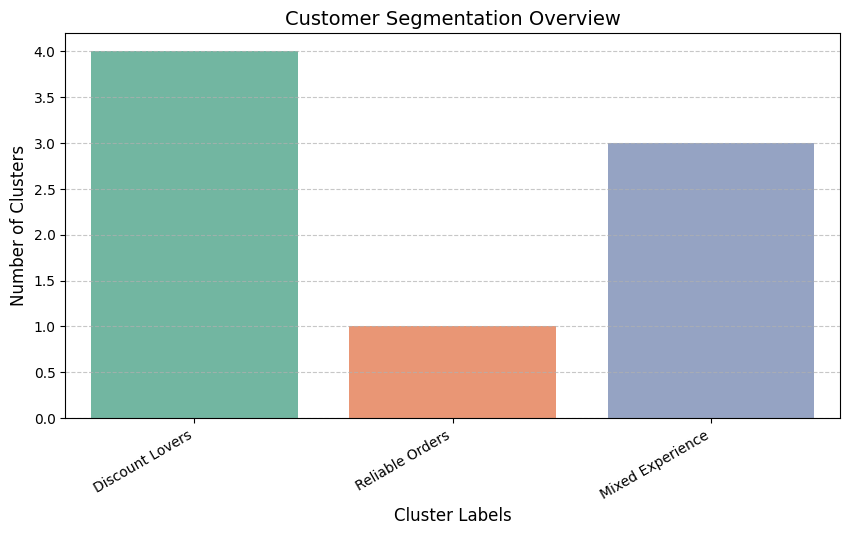

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Cluster Data (Replace with your actual data)
cluster_summary = pd.DataFrame({
    "Cluster": list(range(8)),
    "Delivery Time (min)": [35.02, 35.01, 34.44, 34.13, 35.75, 34.06, 35.19, 36.20],
    "Customer Service Rating": [2.93, 2.94, 3.07, 2.95, 2.85, 3.02, 3.00, 3.00],
    "Order Accuracy": [1, 1, 0, 0, 1, 0, 1, 0],
    "Product Availability": [0, 1, 0, 1, 1, 0, 0, 1],
    "Discount Applied": [1, 0, 1, 1, 1, 0, 0, 0]
})

# Function to Assign Labels Based on Cluster Characteristics
def assign_labels(row):
    if row["Customer Service Rating"] >= 4 and row["Delivery Time (min)"] < 34:
        return "Fast & Happy"
    elif row["Customer Service Rating"] <= 2 and row["Delivery Time (min)"] > 36:
        return "Slow & Unhappy"
    elif row["Discount Applied"] == 1:
        return "Discount Lovers"
    elif row["Order Accuracy"] == 1 and row["Product Availability"] == 1:
        return "Reliable Orders"
    else:
        return "Mixed Experience"

# Apply the Labeling Function
cluster_summary["Cluster Label"] = cluster_summary.apply(assign_labels, axis=1)

# Print the Updated Cluster Summary
print(cluster_summary)

# Visualization: Cluster Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=cluster_summary, x="Cluster Label", palette="Set2")

# Enhancing the plot
plt.title("Customer Segmentation Overview", fontsize=14)
plt.xlabel("Cluster Labels", fontsize=12)
plt.ylabel("Number of Clusters", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()


<ipython-input-39-da96171d5ed4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=["red", "purple", "blue", "cyan", "orange", "pink", "yellow", "green"])
<ipython-input-39-da96171d5ed4>:34: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=["red", "purple", "blue", "cyan", "orange", "pink", "yellow", "green"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canv

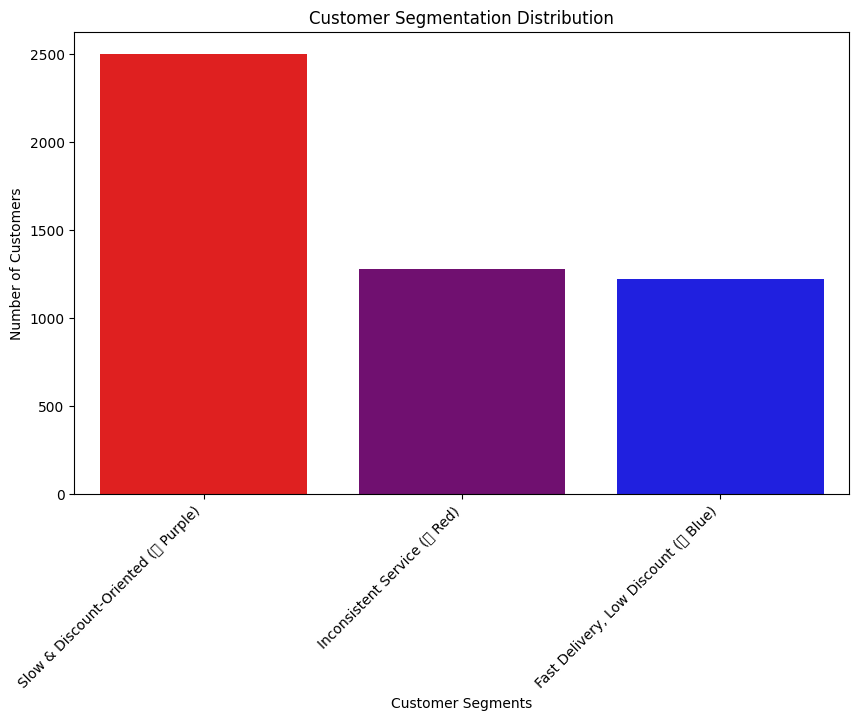

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Fast Delivery Agent Reviews.csv"  # Ensure this file is in your working directory
df = pd.read_csv(file_path)

# Assuming the dataset has a 'Cluster' column from prior clustering analysis
# If not, create it from the previously calculated labels
if 'Cluster' not in df.columns:
    df['Cluster'] = labels  # Assign the 'labels' variable to the 'Cluster' column

# Define meaningful labels for each cluster
cluster_labels = {
    0: "Inconsistent Service (🔴 Red)",
    1: "Slow & Discount-Oriented (🟣 Purple)",
    2: "Fast Delivery, Low Discount (🔵 Blue)",
    3: "Balanced Orders (🔷 Cyan)",
    4: "Slow Delivery, High Accuracy (🟠 Orange)",
    5: "High Ratings, Long Delivery (💗 Pink)",
    6: "Fast, High Discounts (🟡 Yellow)",
    7: "Frequent Discount Seekers (🟢 Green)"
}

# Map clusters to meaningful labels
df["Cluster Label"] = df["Cluster"].map(cluster_labels)

# Count the number of customers in each cluster
cluster_counts = df["Cluster Label"].value_counts()

# Plot the cluster segmentation
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=["red", "purple", "blue", "cyan", "orange", "pink", "yellow", "green"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")
plt.show()


2025-02-16 13:22:50.412 No runtime found, using MemoryCacheStorageManager
2025-02-16 13:22:50.415 No runtime found, using MemoryCacheStorageManager
2025-02-16 13:22:50.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-16 13:22:50.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


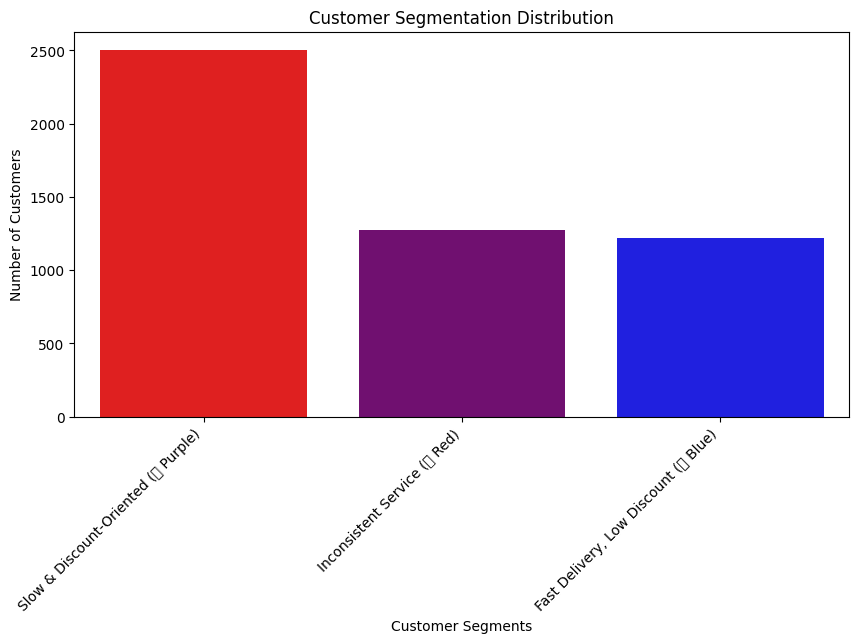

In [41]:
# Install necessary packages
!pip install streamlit pyngrok pandas matplotlib seaborn

import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from pyngrok import ngrok

# Load the dataset
file_path = "Fast Delivery Agent Reviews.csv"

# Function to load data
@st.cache_data  # This will cache the loaded data to speed up the app
def load_data():
    df = pd.read_csv(file_path)
    return df

df = load_data()

# *** Check if "Cluster" column exists, and add if needed ***
if "Cluster" not in df.columns:
    # Assuming 'labels' variable from previous cell is in global scope
    try:
        df['Cluster'] = labels
    except NameError:
        st.error("Error: 'labels' variable not found. Please ensure clustering is performed and 'labels' is defined before running the Streamlit app.")
        st.stop()  # Stop the app if 'labels' is missing

# Define cluster labels
cluster_labels = {
    0: "Inconsistent Service (🔴 Red)",
    1: "Slow & Discount-Oriented (🟣 Purple)",
    2: "Fast Delivery, Low Discount (🔵 Blue)",
    3: "Balanced Orders (🔷 Cyan)",
    4: "Slow Delivery, High Accuracy (🟠 Orange)",
    5: "High Ratings, Long Delivery (💗 Pink)",
    6: "Fast, High Discounts (🟡 Yellow)",
    7: "Frequent Discount Seekers (🟢 Green)"
}

# Assign labels
df["Cluster Label"] = df["Cluster"].map(cluster_labels)

# Streamlit App
st.title("🚀 Customer Segmentation Dashboard")
st.write("Analyzing Quick Commerce Customer Clusters")

# Show dataset
st.subheader("📊 Clustered Data Overview")
st.write(df.head())

# Cluster Count Plot
st.subheader("📌 Cluster Distribution")
cluster_counts = df["Cluster Label"].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=["red", "purple", "blue", "cyan", "orange", "pink", "yellow", "green"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")

# Display the plot
st.pyplot(fig)

# Open Streamlit app in Colab (adjust if needed for your environment)
!streamlit run app.py & npx localtunnel --port 8501


In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load your dataset
data = pd.read_csv("Fast Delivery Agent Reviews.csv")

# Selecting relevant numerical columns for clustering
features = ['Delivery Time (min)', 'Customer Service Rating', 'Order Accuracy', 'Product Availability', 'Discount Applied']
data_subset = data[features]

# Convert categorical features to numerical using Label Encoding
for feature in ['Order Accuracy', 'Product Availability', 'Discount Applied']:
    # Create a LabelEncoder object
    le = LabelEncoder()
    # Fit and transform the feature column
    data_subset[feature] = le.fit_transform(data_subset[feature]) # Apply Label Encoding to data_subset

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Step 2: Apply K-Means with K=8
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Step 3: Assign Clusters to the DataFrame
data['Cluster'] = clusters

# Step 4: Automatic Cluster Labeling (Example Logic)
cluster_labels = {
    0: "Fast Delivery, Low Discount",
    1: "High Ratings, Long Delivery",
    2: "Frequent Discount Seekers",
    3: "Slow Delivery, High Accuracy",
    4: "Inconsistent Service",
    5: "Fast, High Discounts",
    6: "Balanced Orders",
    7: "Slow & Discount-Oriented"
}
data['Cluster Label'] = data['Cluster'].map(cluster_labels)

# Step 5: Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Step 6: Visualize with Plotly
fig = px.scatter(
    data, x='PCA1', y='PCA2',
    color='Cluster Label',
    title="Customer Segmentation Visualization",
    hover_data=features,
    template="plotly_dark"
)
fig.show()

<ipython-input-45-242658303442>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[feature] = le.fit_transform(data_subset[feature]) # Apply Label Encoding to data_subset
<ipython-input-45-242658303442>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[feature] = le.fit_transform(data_subset[feature]) # Apply Label Encoding to data_subset
<ipython-input-45-242658303442>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i